In [1]:
"""
!pip install Augmentor
!pip install pillow
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install keras
!pip install scikit-image
!unzip ./python/images_background.zip
!unzip ./python/images_background_small1.zip
!unzip ./python/images_background_small2.zip
!unzip ./python/images_evaluation.zip
"""

'\n!pip install Augmentor\n!pip install pillow\n!pip install pandas\n!pip install matplotlib\n!pip install numpy\n!pip install keras\n!pip install scikit-image\n!unzip ./python/images_background.zip\n!unzip ./python/images_background_small1.zip\n!unzip ./python/images_background_small2.zip\n!unzip ./python/images_evaluation.zip\n'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from load_data import load_directory, train_gen, val_gen, quiz_models, LossTracker
from build_models import make_convnet, make_capsnet, train_convnet, train_capsnet, plot_history
import tensorflow as tf
from keras.models import load_model, Sequential, Model
from keras.layers import Input
from capsulelayers import Length, Mask
from matplotlib.patches import Patch

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
#Set up for Angelic alphabet
batch_size = 30
alphabet = 'Angelic'
directory = './images_evaluation/{}/'.format(alphabet)
train, test, labels = load_directory(directory)
loss_tracker = LossTracker() #Tracks loss for augmentation schedule.
tg = train_gen(train, labels, batch_size=batch_size, augmentation=True, loss_obj=loss_tracker)
vg = val_gen(test, labels, batch_size=len(test)//19)
input_shape = (105, 105, 1)
n_class = len(labels)

Progress: [#########################] 99.5% 

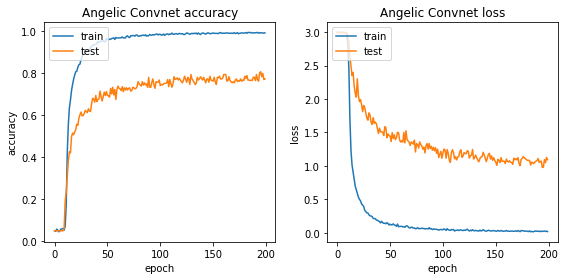

In [4]:
#Set "width" 42, results in 23,498,138 parameters.
convnet = make_convnet(input_shape, n_class, width=42, dropout=.5)

history = train_convnet(convnet, tg, vg, directory, loss_obj=loss_tracker, epochs=200)
plot_history(history, model_name='Angelic Convnet')


quizzing best accuracy model...



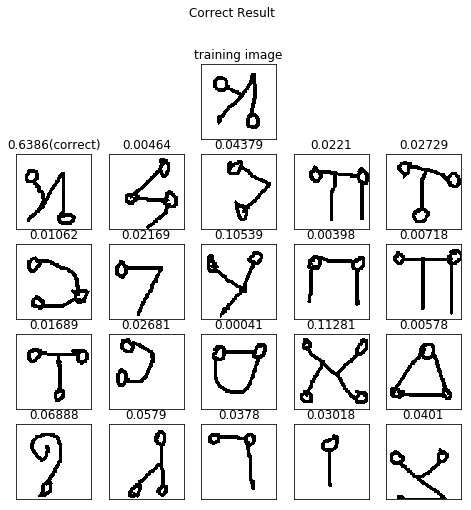

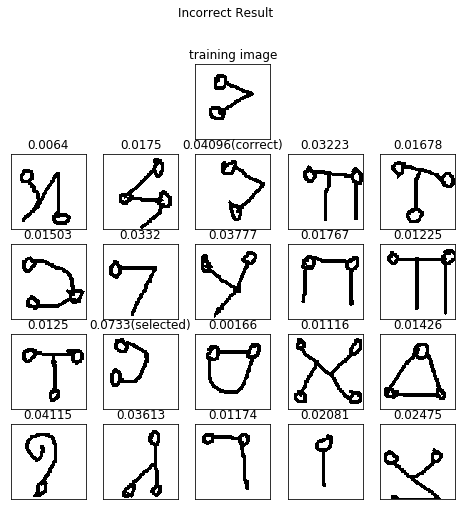

Quiz results: 330 out of 380 correct.
Quiz accuracy score: 0.868. Error rate: 0.132
Classification results: 307 out of 380 correct.
Classification accuracy score: 0.808. Error rate: 0.192

quizzing best loss model...

Quiz results: 326 out of 380 correct.
Quiz accuracy score: 0.858. Error rate: 0.142
Classification results: 305 out of 380 correct.
Classification accuracy score: 0.803. Error rate: 0.197

quizzing overfit model...

Quiz results: 327 out of 380 correct.
Quiz accuracy score: 0.861. Error rate: 0.139
Classification results: 294 out of 380 correct.
Classification accuracy score: 0.774. Error rate: 0.226


In [5]:
results1_Ang, results2_Ang, results3_Ang = quiz_models(directory, test, labels, visualize=True, train_df=train)

del convnet

Progress: [########################-] 98.0% 

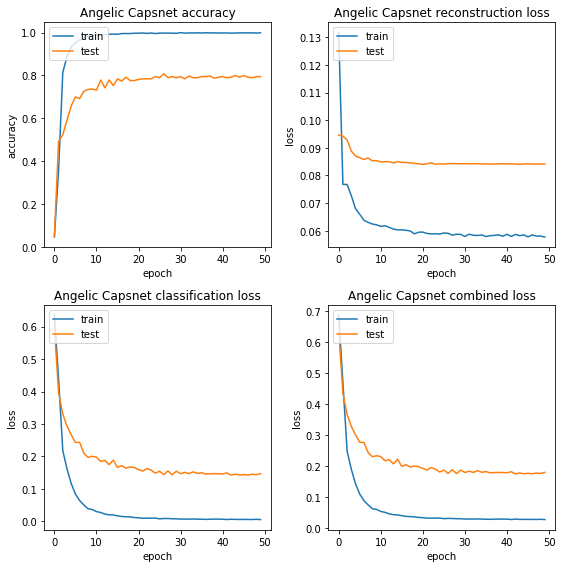

In [6]:
routings = 3
reconstruction_loss = .392
#Capsnet has 22,934,545 parameters
capsnet, eval_model, manipulate_model = make_capsnet(
    input_shape, 
    n_class, 
    routings, 
    reconstruction_loss, 
    lambda_downweight=.4
)

loss_tracker = LossTracker(scale_by=.1) #Advance augmentation schedule. Capsnet is robust to this.
tg = train_gen(train, labels, batch_size=batch_size, augmentation=True, loss_obj=loss_tracker)
vg = val_gen(test, labels, batch_size=len(test)//19)
val_steps = 19
history = train_capsnet(capsnet, tg, vg, directory, loss_obj=loss_tracker, validation_steps=val_steps, epochs=50)

plot_history(history, model_name='Angelic Capsnet', capsnet=True)


quizzing best accuracy model...



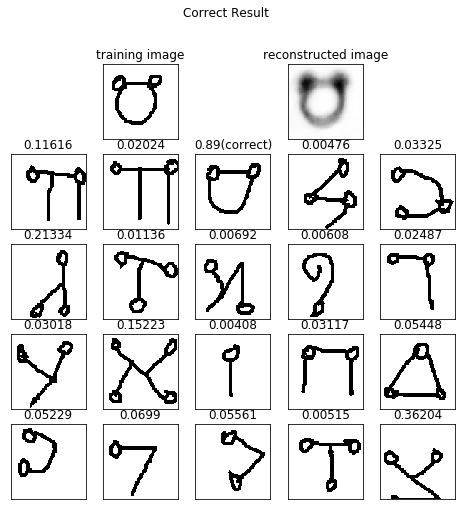

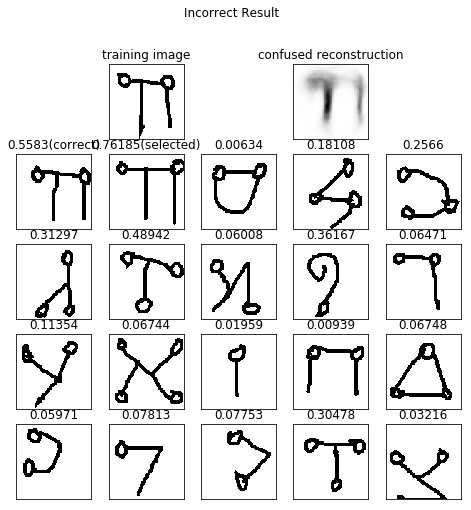

Quiz results: 315 out of 380 correct.
Quiz accuracy score: 0.829. Error rate: 0.171
Classification results: 307 out of 380 correct.
Classification accuracy score: 0.808. Error rate: 0.192

quizzing best loss model...

Quiz results: 317 out of 380 correct.
Quiz accuracy score: 0.834. Error rate: 0.166
Classification results: 301 out of 380 correct.
Classification accuracy score: 0.792. Error rate: 0.208

quizzing overfit model...

Quiz results: 309 out of 380 correct.
Quiz accuracy score: 0.813. Error rate: 0.187
Classification results: 302 out of 380 correct.
Classification accuracy score: 0.795. Error rate: 0.205


In [7]:
results_caps1_Ang, results_caps2_Ang, results_caps3_Ang = quiz_models(
    directory, 
    test, 
    labels, 
    capsnet=True, 
    visualize=True,
    eval_model=eval_model,
    train_df=train
)

del capsnet

In [8]:
#Set up for Atemayar Qelisayer alphabet
batch_size = 30
alphabet = 'Atemayar_Qelisayer'
directory = './images_evaluation/{}/'.format(alphabet)
train, test, labels = load_directory(directory)
loss_tracker = LossTracker() #Tracks loss for augmentation schedule.
tg = train_gen(train, labels, batch_size=batch_size, augmentation=True, loss_obj=loss_tracker)
vg = val_gen(test, labels, batch_size=len(test)//19)
input_shape = (105, 105, 1)
n_class = len(labels)

Progress: [#########################] 99.5% 

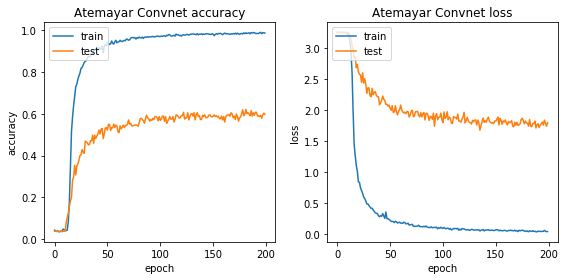

In [9]:
#Set "width" 43, results in 24,700,321 parameters.
convnet = make_convnet(input_shape, n_class, width=43, dropout=.5)

history = train_convnet(convnet, tg, vg, directory, loss_obj=loss_tracker, epochs=200)
plot_history(history, model_name='Atemayar Convnet')


quizzing best accuracy model...



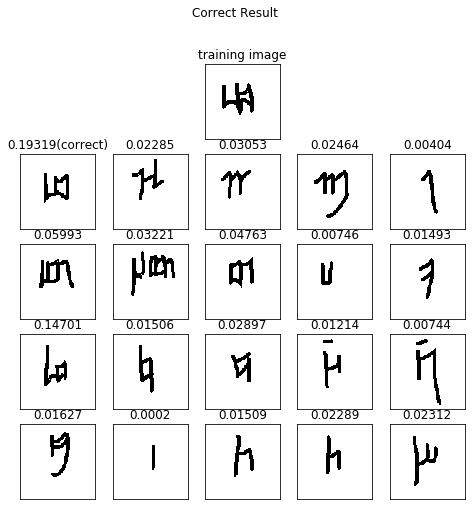

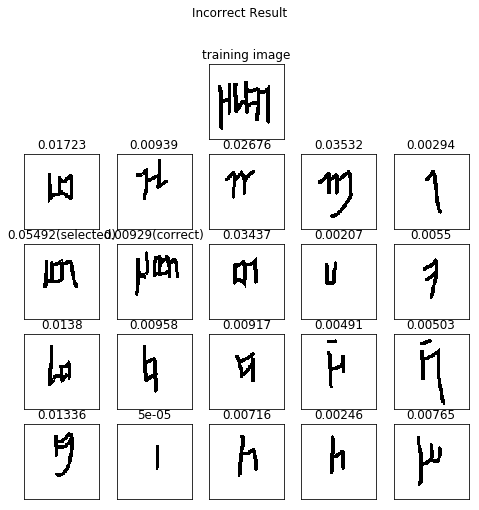

Quiz results: 251 out of 380 correct.
Quiz accuracy score: 0.661. Error rate: 0.339
Classification results: 233 out of 380 correct.
Classification accuracy score: 0.613. Error rate: 0.387

quizzing best loss model...

Quiz results: 257 out of 380 correct.
Quiz accuracy score: 0.676. Error rate: 0.324
Classification results: 232 out of 380 correct.
Classification accuracy score: 0.611. Error rate: 0.389

quizzing overfit model...

Quiz results: 252 out of 380 correct.
Quiz accuracy score: 0.663. Error rate: 0.337
Classification results: 226 out of 380 correct.
Classification accuracy score: 0.595. Error rate: 0.405


In [10]:
results1_AQ, results2_AQ, results3_AQ = quiz_models(directory, test, labels, visualize=True, train_df=train)

del convnet

Progress: [########################-] 98.0% 

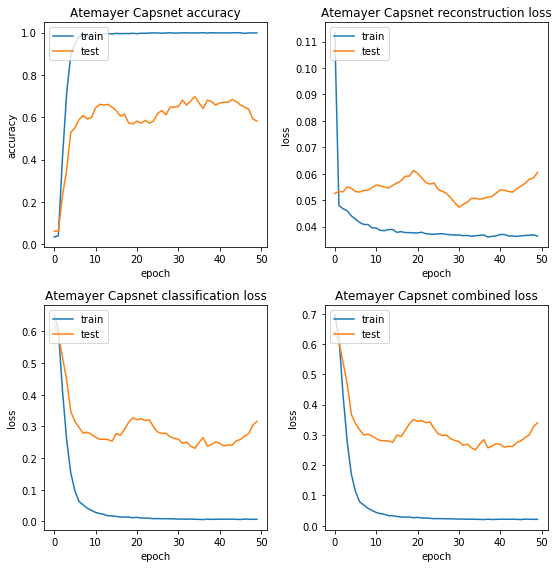

In [11]:
routings = 3
reconstruction_loss = .392
#Capsnet has 24,187,921 parameters
capsnet, eval_model, manipulate_model = make_capsnet(
    input_shape, 
    n_class, 
    routings, 
    reconstruction_loss, 
    lambda_downweight=.35
)

loss_tracker = LossTracker(scale_by=.1) #Advance augmentation schedule. Capsnet is robust to this.
tg = train_gen(train, labels, batch_size=batch_size, augmentation=True, loss_obj=loss_tracker)
vg = val_gen(test, labels, batch_size=len(test)//batch_size)
val_steps = 19
history = train_capsnet(capsnet, tg, vg, directory, loss_obj=loss_tracker, validation_steps=val_steps, epochs=50)

plot_history(history, model_name='Atemayer Capsnet', capsnet=True)


quizzing best accuracy model...



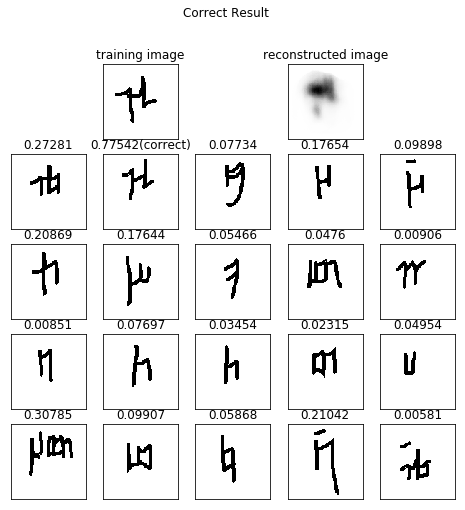

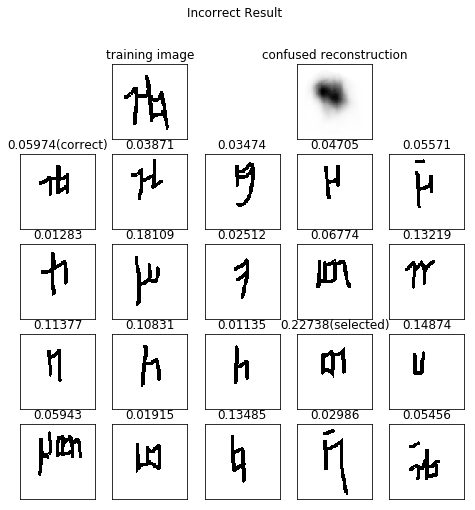

Quiz results: 274 out of 380 correct.
Quiz accuracy score: 0.721. Error rate: 0.279
Classification results: 253 out of 380 correct.
Classification accuracy score: 0.666. Error rate: 0.334

quizzing best loss model...

Quiz results: 276 out of 380 correct.
Quiz accuracy score: 0.726. Error rate: 0.274
Classification results: 246 out of 380 correct.
Classification accuracy score: 0.647. Error rate: 0.353

quizzing overfit model...

Quiz results: 275 out of 380 correct.
Quiz accuracy score: 0.724. Error rate: 0.276
Classification results: 244 out of 380 correct.
Classification accuracy score: 0.642. Error rate: 0.358


In [12]:
results_caps1_AQ, results_caps2_AQ, results_caps3_AQ = quiz_models(
    directory, 
    test, 
    labels, 
    capsnet=True, 
    visualize=True,
    eval_model=eval_model,
    train_df=train
)

del capsnet

In [13]:
#Set up for Oriya alphabet
batch_size = 30
alphabet = 'Oriya'
directory = './images_evaluation/{}/'.format(alphabet)
train, test, labels = load_directory(directory)
loss_tracker = LossTracker() #Tracks loss for augmentation schedule.
tg = train_gen(train, labels, batch_size=batch_size, augmentation=True, loss_obj=loss_tracker)
vg = val_gen(test, labels, batch_size=len(test)//19)
input_shape = (105, 105, 1)
n_class = len(labels)

Progress: [#########################] 99.5% 

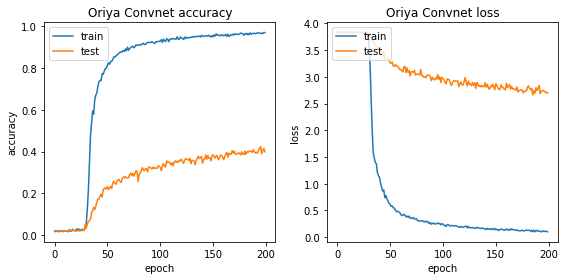

In [14]:
#Set "width" 47, results in 29,495,037 parameters.
convnet = make_convnet(input_shape, n_class, width=47, dropout=.5)

history = train_convnet(convnet, tg, vg, directory, loss_obj=loss_tracker, epochs=200)
plot_history(history, model_name='Oriya Convnet')


quizzing best accuracy model...



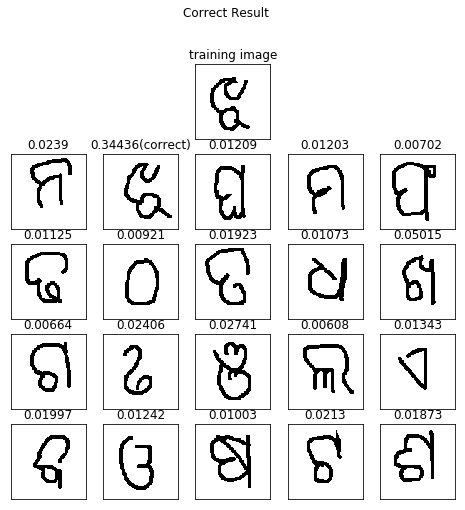

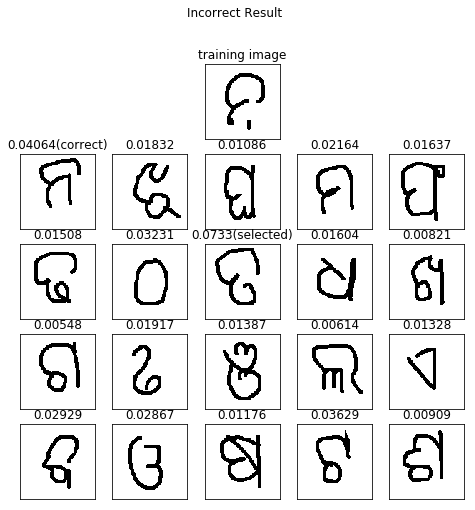

Quiz results: 206 out of 380 correct.
Quiz accuracy score: 0.542. Error rate: 0.458
Classification results: 151 out of 380 correct.
Classification accuracy score: 0.397. Error rate: 0.603

quizzing best loss model...

Quiz results: 217 out of 380 correct.
Quiz accuracy score: 0.571. Error rate: 0.429
Classification results: 158 out of 380 correct.
Classification accuracy score: 0.416. Error rate: 0.584

quizzing overfit model...

Quiz results: 206 out of 380 correct.
Quiz accuracy score: 0.542. Error rate: 0.458
Classification results: 135 out of 380 correct.
Classification accuracy score: 0.355. Error rate: 0.645


In [15]:
results1_Oya, results2_Oya, results3_Oya = quiz_models(directory, test, labels, visualize=True, train_df=train)

del convnet

Progress: [########################-] 98.0% 

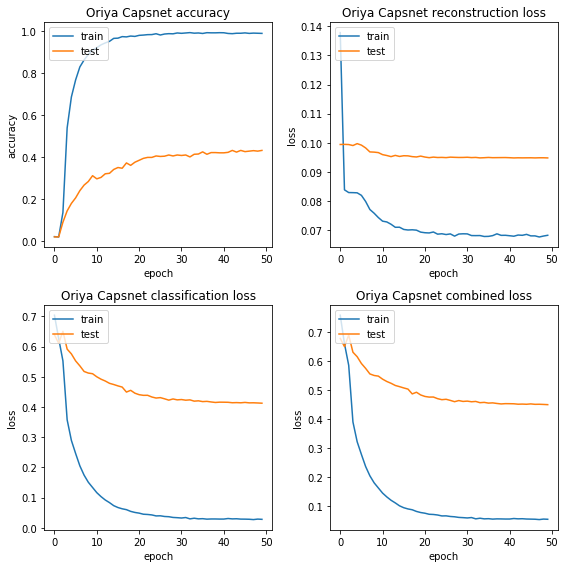

In [16]:
routings = 3
reconstruction_loss = .392
#capsnet has 28,365,841 parameters.
capsnet, eval_model, manipulate_model = make_capsnet(
    input_shape, 
    n_class, 
    routings, 
    reconstruction_loss, 
    lambda_downweight=.3 #lower this number for higher number of classes.
)

loss_tracker = LossTracker(scale_by=.1) #Advance augmentation schedule. Capsnet is robust to this.
tg = train_gen(train, labels, batch_size=batch_size, augmentation=True, loss_obj=loss_tracker)
vg = val_gen(test, labels, batch_size=len(test)//19)
val_steps = 19
history = train_capsnet(capsnet, tg, vg, directory, loss_obj=loss_tracker, validation_steps=val_steps, epochs=50)

plot_history(history, model_name='Oriya Capsnet', capsnet=True)


quizzing best accuracy model...



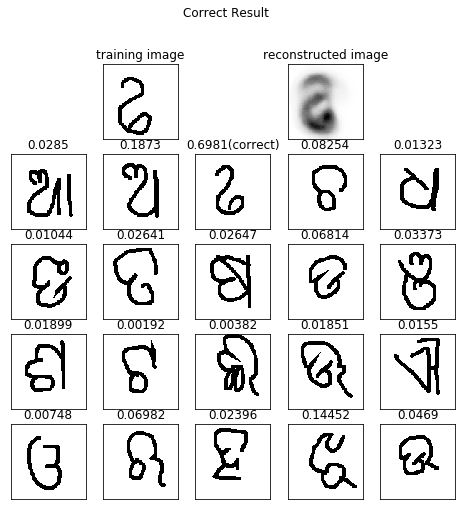

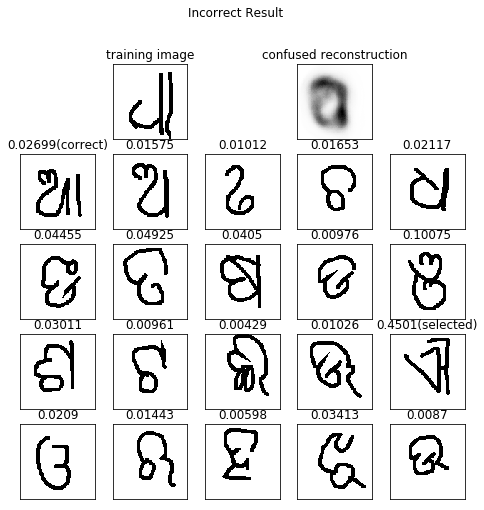

Quiz results: 209 out of 380 correct.
Quiz accuracy score: 0.55. Error rate: 0.45
Classification results: 169 out of 380 correct.
Classification accuracy score: 0.445. Error rate: 0.555

quizzing best loss model...

Quiz results: 217 out of 380 correct.
Quiz accuracy score: 0.571. Error rate: 0.429
Classification results: 168 out of 380 correct.
Classification accuracy score: 0.442. Error rate: 0.558

quizzing overfit model...

Quiz results: 206 out of 380 correct.
Quiz accuracy score: 0.542. Error rate: 0.458
Classification results: 162 out of 380 correct.
Classification accuracy score: 0.426. Error rate: 0.574


In [17]:
results_caps1_Oya, results_caps2_Oya, results_caps3_Oya = quiz_models(
    directory, 
    test, 
    labels, 
    capsnet=True, 
    visualize=True,
    eval_model=eval_model,
    train_df=train
)

del capsnet

In [18]:
def get_best_results(res1, res2, res3):
    results = [res1, res2, res3]
    best_quiz = 0
    best_class = 0
    for res in results:
        best_quiz = max(best_quiz, res[0])
        best_class = max(best_class, res[2])

    best_quiz /= results[0][1]
    best_class /= results[0][3]
    return best_quiz, best_class

bq_Ang, bc_Ang = get_best_results(results1_Ang, results2_Ang, results3_Ang)
bq_caps_Ang, bc_caps_Ang = get_best_results(results_caps1_Ang, results_caps2_Ang, results_caps3_Ang)
bq_AQ, bc_AQ = get_best_results(results1_AQ, results2_AQ, results3_AQ)
bq_caps_AQ, bc_caps_AQ = get_best_results(results_caps1_AQ, results_caps2_AQ, results_caps3_AQ)
bq_Oya, bc_Oya = get_best_results(results1_Oya, results2_Oya, results3_Oya)
bq_caps_Oya, bc_caps_Oya = get_best_results(results_caps1_Oya, results_caps2_Oya, results_caps3_Oya)

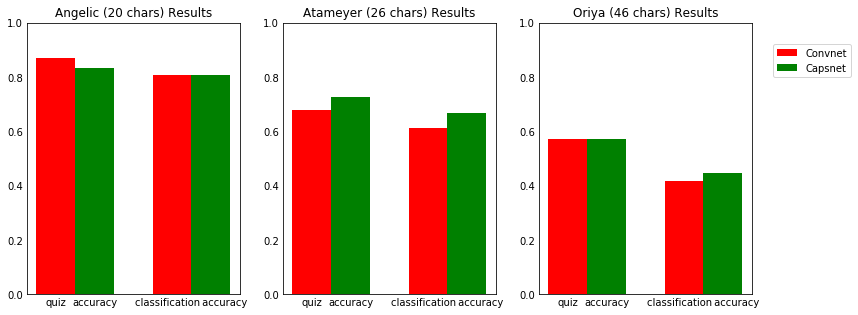

In [19]:
def setup_plot(ax, title, bq, bq_caps, bc, bc_caps):
    ax.set_title(title)
    ax.bar(
        [-1, -.5, .5, 1], 
        height=[bq, bq_caps, bc, bc_caps],
        width = .5,
        tick_label=['quiz', 'accuracy', 'classification   ', '         accuracy'],
        color=['red', 'green', 'red', 'green']
    )
    ax.set_ylim(0, 1)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    for tick in ax.get_xticklabels():
            tick.set_rotation(0)


fig, axs = plt.subplots(1, 3, figsize=(13, 5))
legend_elements = [
    Patch(facecolor='red', label='Convnet'),
    Patch(facecolor='green', label='Capsnet')
]
plt.legend(handles=legend_elements, loc=(1.1, .8))
setup_plot(axs[0], 'Angelic (20 chars) Results', bq_Ang, bq_caps_Ang, bc_Ang, bc_caps_Ang)
setup_plot(axs[1], 'Atameyer (26 chars) Results', bq_AQ, bq_caps_AQ, bc_AQ, bc_caps_AQ)
setup_plot(axs[2], 'Oriya (46 chars) Results', bq_Oya, bq_caps_Oya, bc_Oya, bc_caps_Oya)